In [2]:
import json
import numpy as np
import pandas as pd

import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import pyLDAvis
from gensim.corpora import Dictionary, MmCorpus
import nltk

# gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


import preprocessor as p # 
import string # use string.punctuation to clean out punctuation

from pprint import pprint

from datetime import datetime
import pickle



from tqdm import tqdm

pd.set_option('display.max_colwidth', -1)
%matplotlib inline

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [3]:
with open("clean_tweets_sample.pkl", 'rb') as picklefile: 
    sampleDF = pickle.load(picklefile)

In [4]:
with open("clean_tweets_full.pkl", 'rb') as picklefile: 
    fullDF = pickle.load(picklefile)

In [5]:
def just_text(tweetsDF):
    cleanDF = pd.DataFrame(columns = ['id','full_text'])
    cleanDF['full_text'] = tweetsDF['full_text']
    cleanDF.drop('id',axis = 1).head()
    return cleanDF

In [6]:
sampletextDF = just_text(sampleDF)

In [140]:
sampleDF

,user,created_at,full_text,truncated,contains_url,favorite_count,location,time_zone,following_count,followers_count,retweet_count,Polarity,Subjectivity,topic_LDA
0,MartinKACrook,2018-02-28 22:32:24+00:00,population control will not reverse or mitigate climate change here is the logic and evidence populationcontrollaw,False,1,0,None,Amsterdam,94,71,0,0.000000,0.000000,3
1,AggieHJ,2018-02-28 22:32:06+00:00,i see climate change deniers are out in force today due to the cold weather in europe they still haven t bothered to research the issue properly and are still hung up on the global warming meaning climatechangeisreal,False,1,0,None,None,218,307,0,-0.181250,0.368750,3
2,MadonnaMadsen,2018-02-28 22:32:00+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,Central Time (US & Canada),10202,10713,3,0.000000,0.150000,0
3,hackneywick,2018-02-28 22:31:58+00:00,and yes it s consistent with climate change warming at the poles weakens the jetstream which blows warm air from the west and allows colder air in from the east,False,1,0,None,London,7031,8057,2,0.425000,0.425000,1
4,ONGYEWKHOON5,2018-02-28 22:31:19+00:00,can lee s l do something to safe the global warming and climate changes,False,1,0,Singapore,None,3896,806,0,0.250000,0.250000,0
5,munkihanger,2018-02-28 22:31:16+00:00,john ashton trying to elain to mayhem and co in necessarily very simple terms that allowing fracking won t help reduce global warming and catastrophic climate breakdown wonder if they ll get the message best keep on with nvda until they do roll on the united resistance,False,1,0,None,None,222,346,4,0.333333,0.254762,2
6,tlane04,2018-02-28 22:30:31+00:00,it might seem counterintuitive but global warming plays a role in blasts of bitter cold weather the reason it influences the jet stream here s how,False,1,0,None,None,474,56,153,-0.233333,0.500000,2
7,rcjhawk86,2018-02-28 22:29:50+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,None,6380,6295,3,0.000000,0.150000,0
8,bestdoxiemom,2018-02-28 22:29:47+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,None,4991,4951,3,0.000000,0.150000,0
9,yergnflergn,2018-02-28 22:29:34+00:00,if you want to research the soyboy epidemic causes just allege a link and possible solution to global warming sorry climate change in the research grant application maybe study the combined potential of estrogen and soy flatulence to absorb co and bam the money s in the bank,False,0,0,None,None,313,197,0,-0.125000,0.750000,2


In [8]:
fulltextDF = just_text(fullDF)

# LDA Topic Modelling

Add column with topic for document

In [9]:
def nltk_stopwords():
    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['change','global', 'warming', 'climate', 'climatechange', 'globalwarming', 'climate change', 'global warming', 'new', 'means']
    stopwords.extend(newStopWords)
    
    return stopwords

In [10]:
def print_top_words(model, feature_names, n_top_words = 20):
   #"""Print top words in each topic."""
    for topic_idx, topic in enumerate(model.components_):
        print ("\nTopic #%d:" % topic_idx)
        print (", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [11]:
def get_topics_lda(df, n_topics):  
    count_vect = CountVectorizer(analyzer = "word",
                                      stop_words = nltk_stopwords(),
                                      #max_features = 1000,
                                      max_df = 0.7,
                                      min_df = 2)
    matrix = count_vect.fit_transform(df)
    vocab = count_vect.get_feature_names()


   # fit transform lda
    lda = LatentDirichletAllocation(n_components=n_topics,
               learning_method='online', learning_offset=50., max_iter=10,
               random_state=0)
   
    doc_topic_dists = lda.fit_transform(matrix)
   
   # print topic words
   #print "\nTopics in LDA model:", cand
    print_top_words(lda, vocab)
   
   # prepare pyLDAvis
    get_normed = lambda data: pd.DataFrame(data).div(data.sum(axis = 1), axis = 0)
    prepared = pyLDAvis.prepare(
           doc_lengths = df.str.len(),
           vocab = vocab,
           term_frequency = np.asarray(matrix.sum(axis = 0)).ravel().tolist(),
           topic_term_dists = get_normed(lda.components_), # topics x terms
           doc_topic_dists = get_normed(doc_topic_dists)) # docs x topics
   
    return lda, doc_topic_dists, prepared, vocab

In [12]:
def get_word_freq(topic, model, n_top_words, vocab):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    
    word_dict = {};
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
    freq = sorted(model.components_[topic])[:-n_top_words - 1: -1]
    
    words_ids = model.components_[topic].argsort()[:-n_top_words - 1:-1]
    words = [vocab[key] for key in words_ids]
    
    for i in range(n_top_words):
        word_dict[words[i]] = freq[i]

    
    return word_dict

In [13]:
def get_doc_topics(doc_topic_dist):
   """Return list of topics for documents, given doc topic distribution"""
   return [np.argmax(topic) for doc, topic in enumerate(doc_topic_dist)]

## Sample

In [14]:
sampleDF.full_text

0        population control will not reverse or mitigate climate change here is the logic and evidence populationcontrollaw                                                                                                                                                                     
1        i see climate change deniers are out in force today due to the cold weather in europe they still haven t bothered to research the issue properly and are still hung up on the global warming meaning climatechangeisreal                                                               
2        convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax                    
3        and yes it s consistent with climate change warming at the poles weakens the jetstream which blows warm air from the west an

In [15]:
all_lda, all_doc_topics, all_prepared,vocab = get_topics_lda(sampleDF['full_text'], 4)


Topic #0:
changed, six, americans, minds, arctic, year, china, plant, trees, pollution, wants, address, soldiers, giving, fight, helicopter, suvs, exnknew, rides, via

Topic #1:
science, extreme, air, many, ice, weather, degrees, normal, oceans, faster, nothing, artic, denial, also, emissions, eeriencing, humans, economics, profit, would

Topic #2:
record, india, million, hours, trees, plants, part, weather, environmental, campaign, breaking, need, jet, us, stream, cold, impact, might, support, agenda

Topic #3:
world, lakes, rise, around, think, planet, levels, biggest, via, paris, drying, good, agreement, let, years, know, water, despite, could, sea


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [16]:
pyLDAvis.display(all_prepared)

In [17]:
#distribution of topics over the documents
all_doc_topics

array([[0.42135174, 0.03589358, 0.03675836, 0.50599632],
       [0.01630939, 0.25350407, 0.15242372, 0.57776283],
       [0.85681015, 0.00957194, 0.04525278, 0.08836513],
       ...,
       [0.02095378, 0.52052105, 0.1041388 , 0.35438637],
       [0.64024653, 0.09741344, 0.0184015 , 0.24393854],
       [0.54859037, 0.30483606, 0.12557625, 0.02099732]])

In [18]:
# categorize reviews by most probable topic
sampleDF['topic_LDA'] = get_doc_topics(all_doc_topics)

In [19]:
sampleDF

,user,created_at,full_text,truncated,contains_url,favorite_count,location,time_zone,following_count,followers_count,retweet_count,Polarity,Subjectivity,topic_LDA
0,MartinKACrook,2018-02-28 22:32:24+00:00,population control will not reverse or mitigate climate change here is the logic and evidence populationcontrollaw,False,1,0,None,Amsterdam,94,71,0,0.000000,0.000000,3
1,AggieHJ,2018-02-28 22:32:06+00:00,i see climate change deniers are out in force today due to the cold weather in europe they still haven t bothered to research the issue properly and are still hung up on the global warming meaning climatechangeisreal,False,1,0,None,None,218,307,0,-0.181250,0.368750,3
2,MadonnaMadsen,2018-02-28 22:32:00+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,Central Time (US & Canada),10202,10713,3,0.000000,0.150000,0
3,hackneywick,2018-02-28 22:31:58+00:00,and yes it s consistent with climate change warming at the poles weakens the jetstream which blows warm air from the west and allows colder air in from the east,False,1,0,None,London,7031,8057,2,0.425000,0.425000,1
4,ONGYEWKHOON5,2018-02-28 22:31:19+00:00,can lee s l do something to safe the global warming and climate changes,False,1,0,Singapore,None,3896,806,0,0.250000,0.250000,0
5,munkihanger,2018-02-28 22:31:16+00:00,john ashton trying to elain to mayhem and co in necessarily very simple terms that allowing fracking won t help reduce global warming and catastrophic climate breakdown wonder if they ll get the message best keep on with nvda until they do roll on the united resistance,False,1,0,None,None,222,346,4,0.333333,0.254762,2
6,tlane04,2018-02-28 22:30:31+00:00,it might seem counterintuitive but global warming plays a role in blasts of bitter cold weather the reason it influences the jet stream here s how,False,1,0,None,None,474,56,153,-0.233333,0.500000,2
7,rcjhawk86,2018-02-28 22:29:50+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,None,6380,6295,3,0.000000,0.150000,0
8,bestdoxiemom,2018-02-28 22:29:47+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,None,4991,4951,3,0.000000,0.150000,0
9,yergnflergn,2018-02-28 22:29:34+00:00,if you want to research the soyboy epidemic causes just allege a link and possible solution to global warming sorry climate change in the research grant application maybe study the combined potential of estrogen and soy flatulence to absorb co and bam the money s in the bank,False,0,0,None,None,313,197,0,-0.125000,0.750000,2


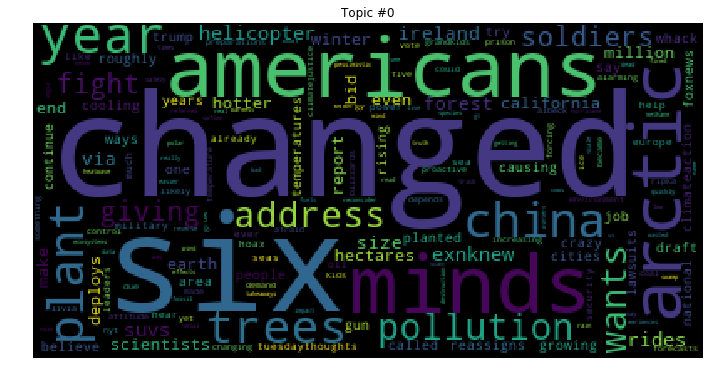

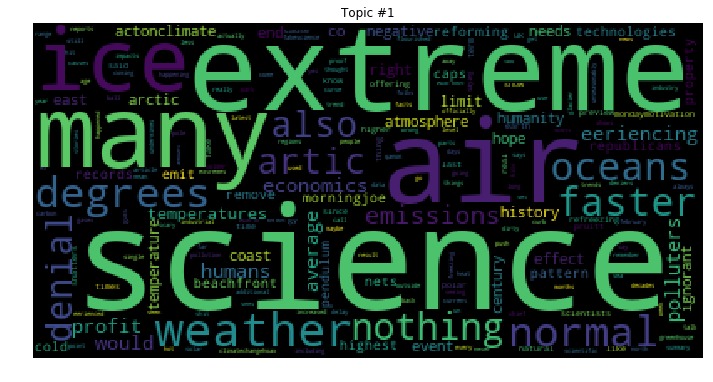

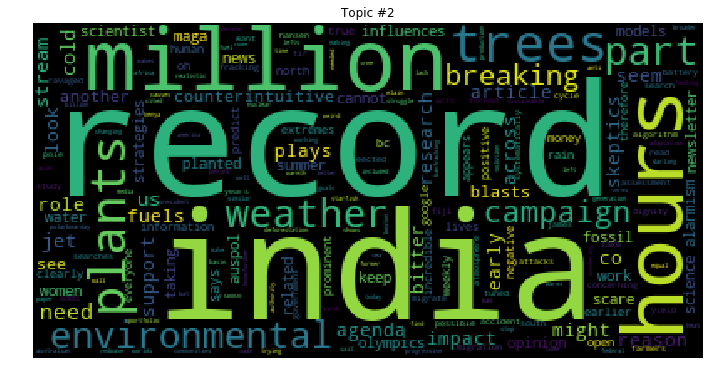

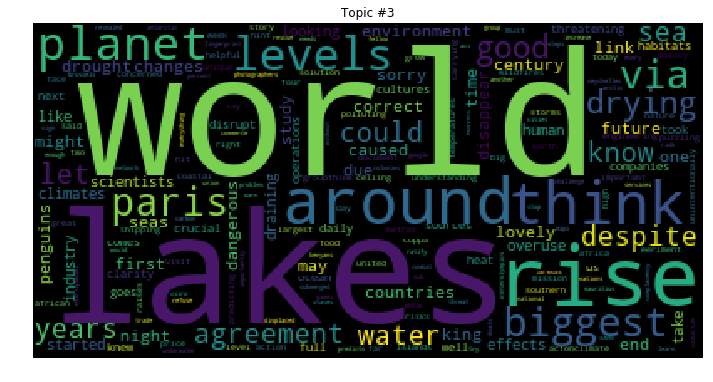

In [20]:
for t in range(4):
    plt.figure(figsize = (12,16))
    plt.imshow(WordCloud().fit_words(dict(get_word_freq(t, all_lda, 200, vocab))))
    plt.axis('off')
    plt.title('Topic #' + str(t))
    plt.show();

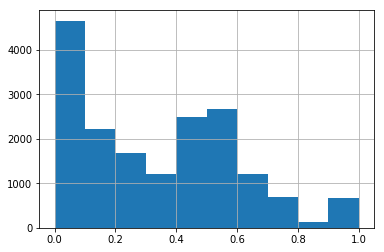

In [21]:
sampleDF.Subjectivity.hist()

In [22]:
sampleDF[sampleDF.Polarity < 0.1].groupby('topic_LDA')['Polarity'].count()

topic_LDA
0    3439
1    3013
2    1835
3    3328
Name: Polarity, dtype: int64

In [23]:
sampleDF[sampleDF.Polarity >= 0.1].groupby('topic_LDA')['Polarity'].count()

topic_LDA
0    2289
1    1554
2    332 
3    1789
Name: Polarity, dtype: int64

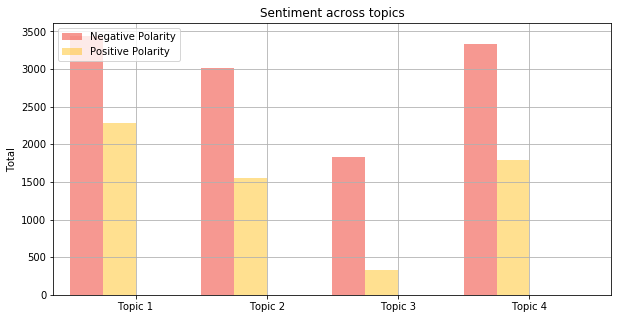

In [24]:
# Setting the positions and width for the bars
pos = list(range(4)) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        sampleDF[sampleDF.Polarity < 0.1].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

plt.bar([p + width for p in pos], 
        #using df['pre_score'] data,
        sampleDF[sampleDF.Polarity >= 0.1].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

# Set the y axis label
ax.set_ylabel('Total')

# Set the chart's title
ax.set_title('Sentiment across topics')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Topic 1', 'Topic 2', 'Topic 3','Topic 4'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)


# Adding the legend and showing the plot
plt.legend(['Negative Polarity', 'Positive Polarity'], loc='upper left')
plt.grid()
plt.show()

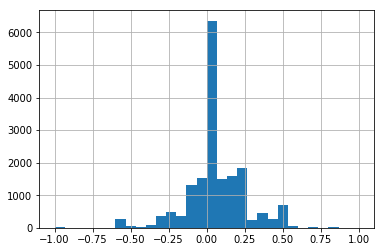

In [25]:
sampleDF.Polarity.hist(bins = 30)

## Full Set

In [26]:
all_lda, all_doc_topics, all_prepared, vocab = get_topics_lda(fullDF['full_text'], 4)


Topic #0:
weather, cold, one, scientists, arctic, address, people, venice, wants, ago, via, giving, exnknew, helicopter, rides, suvs, real, snow, levels, years

Topic #1:
trees, million, record, hours, india, part, plants, environmental, campaign, breaking, world, around, future, looking, might, companies, started, clarity, operations, disrupt

Topic #2:
extreme, science, nothing, ice, degrees, normal, denial, artic, eeriencing, economics, profit, polluters, effect, history, highest, air, earth, sea, temperatures, world

Topic #3:
arctic, scientists, even, winter, heatwave, forcing, forecasts, reconsider, pessimistic, see, alarming, ever, sunless, wanted, sentence, know, became, think, like, planet


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [27]:
all_doc_topics.shape

(180920, 4)

In [28]:
fullDF.full_text.shape

(180920,)

In [29]:
np.savetxt('./data/lda_doc_topics.tsv', all_doc_topics, delimiter='\t',newline='\n')

Xlabel = list(fullDF.full_text)
with open('./data/lda_doc_text.tsv', 'w') as file:
    for label in Xlabel:
        file.write(label+'\n')

In [30]:
pyLDAvis.display(all_prepared)

In [31]:
#distribution of topics over the documents
all_doc_topics

array([[0.02533316, 0.12500954, 0.0250001 , 0.8246572 ],
       [0.53203792, 0.05935108, 0.22580302, 0.18280798],
       [0.05349927, 0.05000167, 0.82146216, 0.0750369 ],
       ...,
       [0.35854307, 0.10946129, 0.1866725 , 0.34532314],
       [0.6224026 , 0.0178831 , 0.25731268, 0.10240161],
       [0.39901669, 0.11434367, 0.08260465, 0.40403499]])

In [32]:
# categorize reviews by most probable topic
fullDF['topic_LDA'] = get_doc_topics(all_doc_topics)

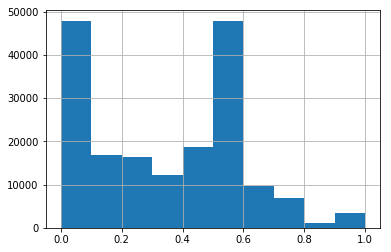

In [33]:
fullDF.Subjectivity.hist()

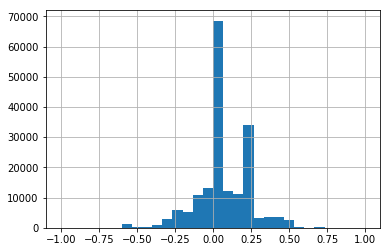

In [34]:
fullDF.Polarity.hist(bins = 30)

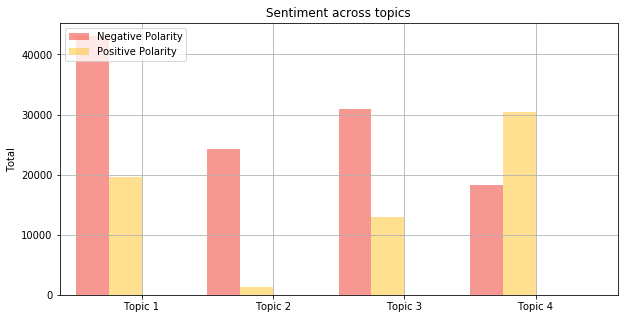

In [35]:
# Setting the positions and width for the bars
pos = list(range(4)) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))
# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        fullDF[fullDF.Polarity < 0.1].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

plt.bar([p + width for p in pos], 
        #using df['pre_score'] data,
        fullDF[fullDF.Polarity >= 0.1].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

# Set the y axis label
ax.set_ylabel('Total')

# Set the chart's title
ax.set_title('Sentiment across topics')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Topic 1', 'Topic 2', 'Topic 3','Topic 4'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)


# Adding the legend and showing the plot
plt.legend(['Negative Polarity', 'Positive Polarity'], loc='upper left')
plt.grid()
plt.show()

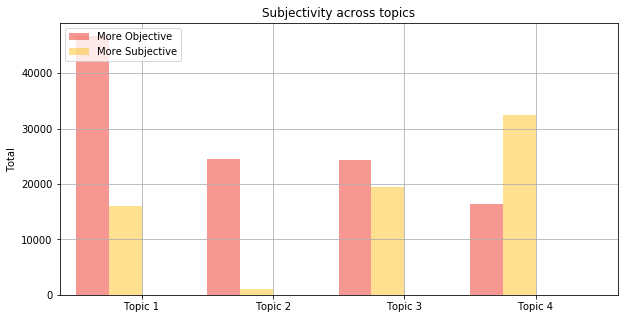

In [36]:
# Setting the positions and width for the bars
pos = list(range(4)) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))
# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        fullDF[fullDF.Subjectivity < 0.5].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

plt.bar([p + width for p in pos], 
        #using df['pre_score'] data,
        fullDF[fullDF.Subjectivity >= 0.5].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

# Set the y axis label
ax.set_ylabel('Total')

# Set the chart's title
ax.set_title('Subjectivity across topics')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Topic 1', 'Topic 2', 'Topic 3','Topic 4'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)


# Adding the legend and showing the plot
plt.legend(['More Objective', 'More Subjective'], loc='upper left')
plt.grid()
plt.show()

In [37]:
fullDF[fullDF.topic_LDA == 0].contains_url.sum()

51261

Topic 0

Total in Topic: 62749 %: 0.3468328543002432

Average Retweets: 1153.8461538461538
Number of links: 51261


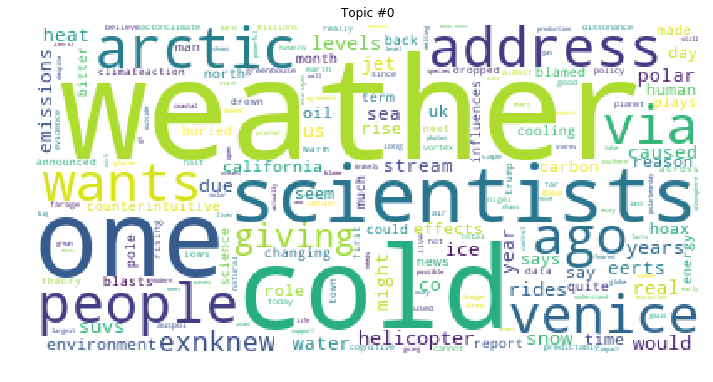

Topic 1

Total in Topic: 25533 %: 0.14112867565774928

Average Retweets: 202.29268292682926
Number of links: 24749


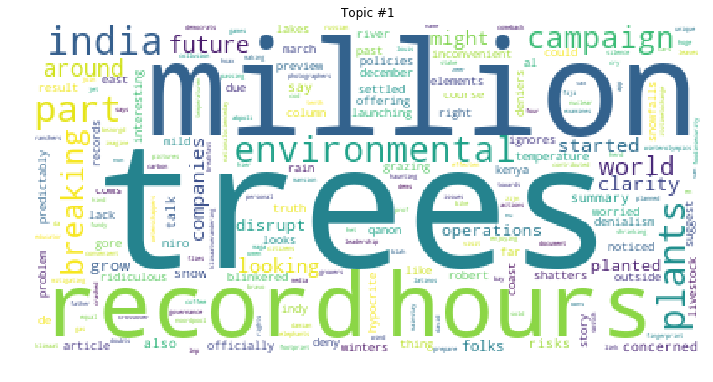

Topic 2

Total in Topic: 43909 %: 0.24269843024541235

Average Retweets: 287.8240740740741
Number of links: 30967


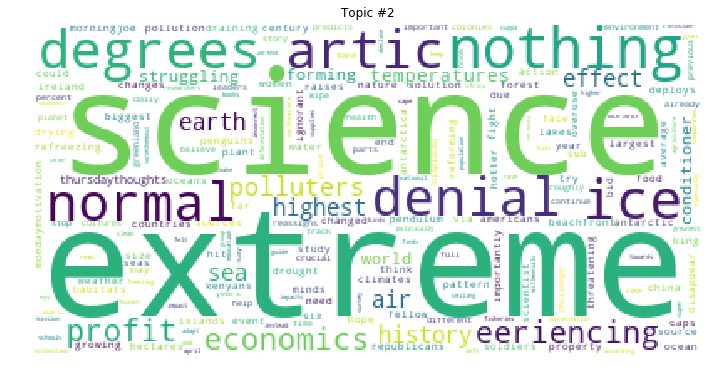

Topic 3

Total in Topic: 48729 %: 0.26934003979659515

Average Retweets: 438.9761904761905
Number of links: 42288


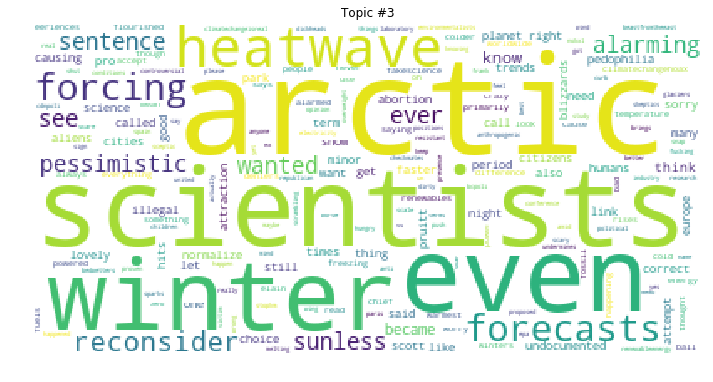

In [38]:
count_total = fullDF['Polarity'].count()

for t in range(4):
    
    count_topic = fullDF[(fullDF.topic_LDA == t)]['Polarity'].count()
    print('Topic', t)
    print('')
    print('Total in Topic:', count_topic, '%:', count_topic/count_total)
    print('')
    print('Average Retweets:', np.mean(fullDF[fullDF.topic_LDA == t].retweet_count.unique()))
    print('Number of links:', fullDF[fullDF.topic_LDA == t].contains_url.sum())
    plt.figure(figsize = (12,16))
    plt.imshow(WordCloud(background_color='white', stopwords = nltk_stopwords()).fit_words(dict(get_word_freq(t, all_lda, 200, vocab))))
    plt.axis('off')
    plt.title('Topic #' + str(t))
    plt.show();

In [39]:
for i in range(4):
    print('Topic',i)
    print('--------------------------------')
    print(fullDF[fullDF.topic_LDA == i].sample(20).full_text)
    print('--------------------------------')

Topic 0
--------------------------------
112346    good coverage of our new analysis on california oil though i am more optimistic than this implies                                                                                                                                                                                   
139698    cape town is almost at the feared day zero                                                                                                                                                                                                                                          
6719      it might seem counterintuitive but global warming plays a role in blasts of bitter cold weather the reason it influences the jet stream here s how                                                                                                                                  
64884     the arctic was ice free years ago when co was below ppm climate scientists ignore this i

In [40]:
import matplotlib.gridspec as gridspec

Topic 0

Total in Topic: 62749 %: 0.3468328543002432

Average Retweets: 1153.8461538461538

Negative: 43081 %: 0.6865607420038566
Positive: 19668 %: 0.31343925799614336


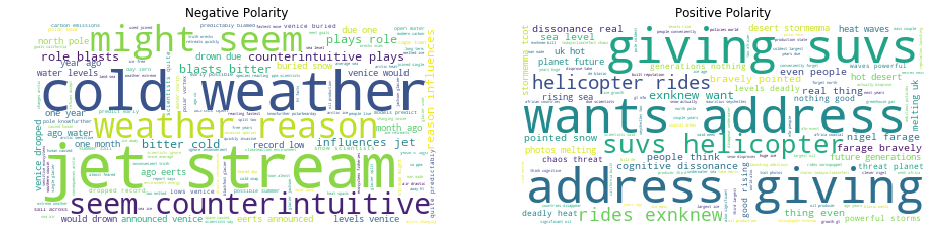

Objective: 46717 %: 0.7445058885400564
Subjective: 16032 %: 0.2554941114599436


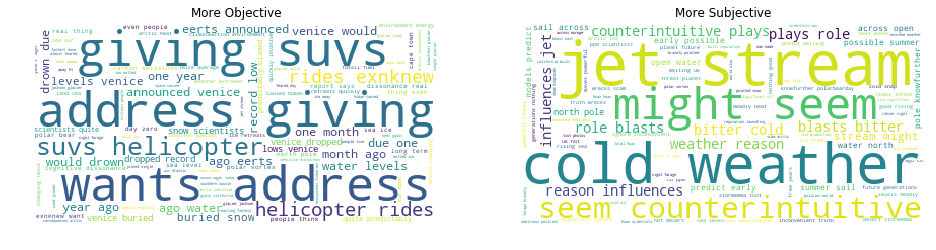

---------------------------------------------------------------
Topic 1

Total in Topic: 25533 %: 0.14112867565774928

Average Retweets: 202.29268292682926

Negative: 24196 %: 0.9476363921200016
Positive: 1337 %: 0.052363607879998435


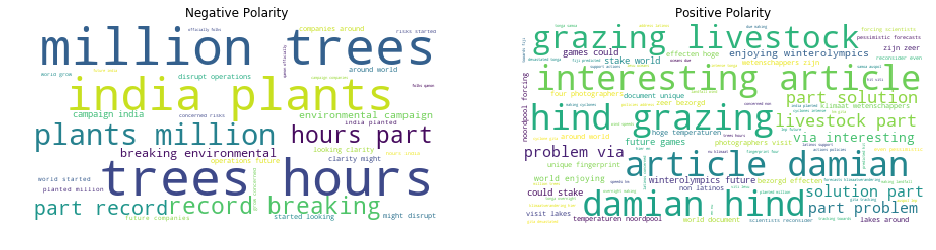

Objective: 24483 %: 0.9588767477382212
Subjective: 1050 %: 0.041123252261778875


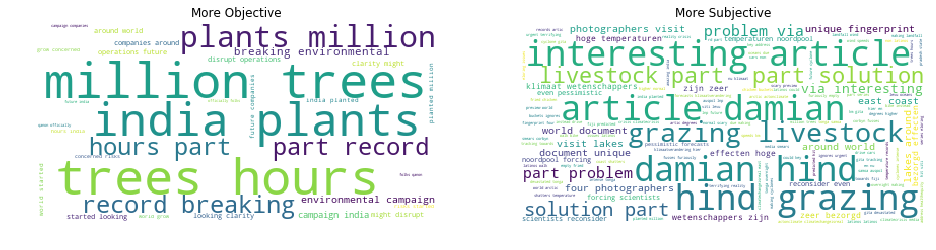

---------------------------------------------------------------
Topic 2

Total in Topic: 43909 %: 0.24269843024541235

Average Retweets: 287.8240740740741

Negative: 30996 %: 0.7059145049989751
Positive: 12913 %: 0.2940854950010248


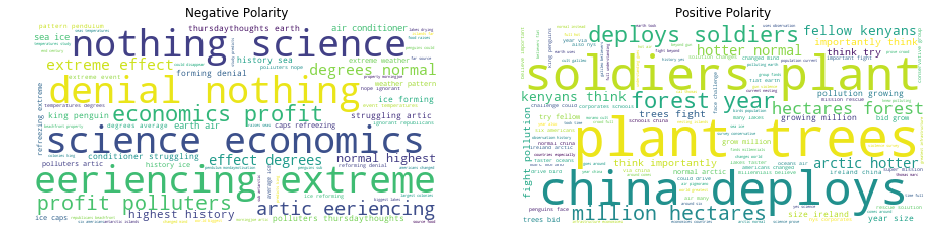

Objective: 24398 %: 0.5556491835386823
Subjective: 19511 %: 0.44435081646131774


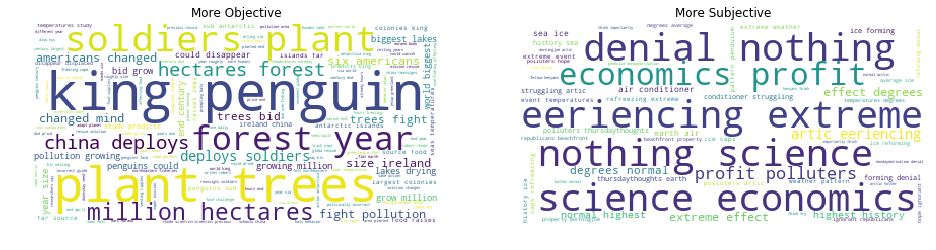

---------------------------------------------------------------
Topic 3

Total in Topic: 48729 %: 0.26934003979659515

Average Retweets: 438.9761904761905

Negative: 18302 %: 0.37558743253504073
Positive: 30427 %: 0.6244125674649592


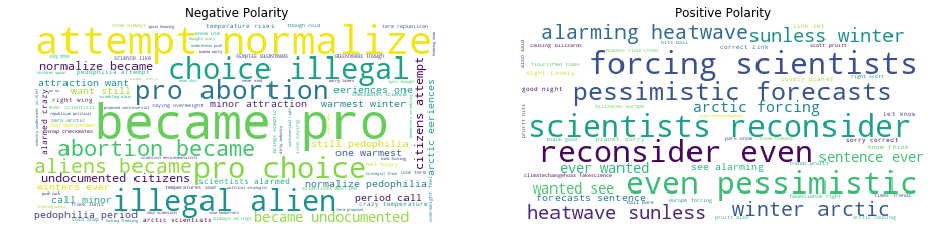

Objective: 16343 %: 0.335385499394611
Subjective: 32386 %: 0.664614500605389


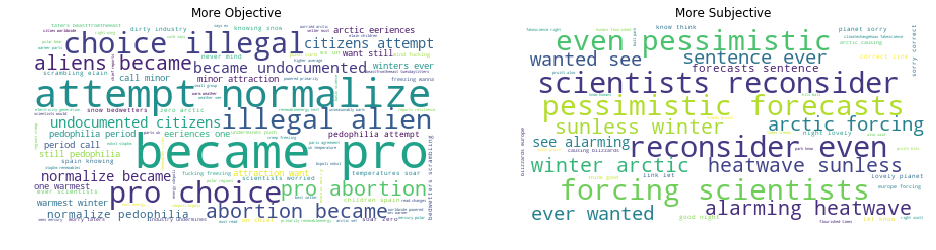

---------------------------------------------------------------


In [41]:
count_total = fullDF['Polarity'].count()

for t in range(4):
    
    count_low_polarity = fullDF[(fullDF.Polarity < 0.1) & (fullDF.topic_LDA == t)]['Polarity'].count()
    count_high_polarity = fullDF[(fullDF.Polarity >= 0.1) & (fullDF.topic_LDA == t)]['Polarity'].count()
    
    count_objective = fullDF[(fullDF.Subjectivity < 0.5) & (fullDF.topic_LDA == t)]['Polarity'].count()
    count_subjective = fullDF[(fullDF.Subjectivity >= 0.5) & (fullDF.topic_LDA == t)]['Polarity'].count()
    
    count_topic = fullDF[(fullDF.topic_LDA == t)]['Polarity'].count()
    
    print('Topic', t)
    
    print('')
    print('Total in Topic:', count_topic, '%:', count_topic/count_total)
    print('')
    print('Average Retweets:', np.mean(fullDF[fullDF.topic_LDA == t].retweet_count.unique()))
    print('')
    
    print('Negative:', count_low_polarity, '%:', count_low_polarity/count_topic)
    print('Positive:', count_high_polarity, '%:', count_high_polarity/count_topic)
    
    plt.figure(figsize = (16,16))    
    plt.subplot(1,2,1)
    plt.imshow(WordCloud(background_color='white', stopwords = nltk_stopwords()).generate(fullDF[(fullDF.Polarity < 0.1)&(fullDF.topic_LDA == t)].full_text.str.cat(sep=' ')))
    plt.axis('off')
    plt.title('Negative Polarity')
    #plt.show()
               
    #plt.figure(figsize = (12,16))
    plt.subplot(1,2,2)
    plt.imshow(WordCloud(background_color='white', stopwords = nltk_stopwords()).generate(fullDF[(fullDF.Polarity >= 0.1)&(fullDF.topic_LDA == t)].full_text.str.cat(sep=' ')))
    plt.axis('off')
    plt.title('Positive Polarity')
    plt.show()
    
    print('Objective:', count_objective, '%:', count_objective/count_topic)
    print('Subjective:', count_subjective, '%:', count_subjective/count_topic)
    
    plt.figure(figsize = (16,16))   
    plt.subplot(1,2,1)
    plt.imshow(WordCloud(background_color='white', stopwords = nltk_stopwords()).generate(fullDF[(fullDF.Subjectivity < 0.5)&(fullDF.topic_LDA == t)].full_text.str.cat(sep=' ')))
    plt.axis('off')
    plt.title('More Objective')
    #plt.show()
               
    #plt.figure(figsize = (12,16))
    plt.subplot(1,2,2)
    plt.imshow(WordCloud(background_color='white', stopwords = nltk_stopwords()).generate(fullDF[(fullDF.Subjectivity >= 0.5)&(fullDF.topic_LDA == t)].full_text.str.cat(sep=' ')))
    plt.axis('off')
    plt.title('More Subjective')
    plt.show()
    
    print('---------------------------------------------------------------')

In [42]:
fullDF[(fullDF.Polarity >= 0.1) & (fullDF.topic_LDA == 0)]['Polarity'].count()

19668

In [43]:
fullDF[(fullDF.Subjectivity >= 0.5) & (fullDF.topic_LDA == 0)]['Subjectivity'].count()

16032

In [44]:
fullDF['Polarity'].count()


180920

In [45]:
np.mean(fullDF[fullDF.topic_LDA == 0].retweet_count.unique())

1153.8461538461538

In [46]:
fullDF.time_zone.value_counts().to_csv('timezonecounts.csv')

In [47]:
map_data = pd.DataFrame()

In [48]:
map_data['total_tweets'] = fullDF.time_zone.value_counts()

In [49]:
map_data['Topic_0'] = fullDF[fullDF.topic_LDA==0].time_zone.value_counts()
map_data['Topic_1'] = fullDF[fullDF.topic_LDA==1].time_zone.value_counts()
map_data['Topic_2'] = fullDF[fullDF.topic_LDA==2].time_zone.value_counts()
map_data['Topic_3'] = fullDF[fullDF.topic_LDA==3].time_zone.value_counts()

In [50]:
map_data['Average_Polarity'] = fullDF.groupby('time_zone').Polarity.mean()
map_data['Average_Subjectivity'] = fullDF.groupby('time_zone').Subjectivity.mean()

In [51]:
map_data.to_csv('timezonecounts2.csv')

In [111]:
map_data['country'] = None
map_data.head()

,total_tweets,Topic_0,Topic_1,Topic_2,Topic_3,Average_Polarity,Average_Subjectivity,country
Pacific Time (US & Canada),24298,9041.0,2614.0,5628.0,7015.0,0.050557,0.337640,None
Eastern Time (US & Canada),17307,5866.0,1552.0,4749.0,5140.0,0.057097,0.356829,None
London,9779,3807.0,899.0,1708.0,3365.0,0.016082,0.370907,None
Central Time (US & Canada),9170,2984.0,978.0,2121.0,3087.0,0.074433,0.354156,None
Nairobi,4676,260.0,2961.0,1310.0,145.0,0.067591,0.162684,None


In [141]:
for t in map_data.index:
    map_data.loc[t,'average_retweets'] = fullDF[fullDF.time_zone == t].retweet_count.unique().mean()
    map_data.loc[t,'average_favorites'] = fullDF[fullDF.time_zone == t].favorite_count.unique().mean()

In [148]:
map_data.index.rename('time_zone', inplace = True)

In [152]:
map_data = map_data.reset_index()

In [470]:
map_data.loc[map_data.time_zone.str.contains('US|CST|EDT|PDT|PST|EST|International|Midway|MDT'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Hawaii|Honolulu'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Arizona'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('New_York'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Alaska'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Chicago'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Los_Angeles'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Denver|Detroit|Boise|Phoenix'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Atlantic'),'country'] = 'United States'

map_data.loc[map_data.time_zone.str.contains('London|GMT|BST'),'country'] = 'United Kingdom'
map_data.loc[map_data.time_zone.str.contains('Amsterdam'),'country'] = 'Netherlands'

map_data.loc[map_data.time_zone.str.contains('Brisbane'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Sydney'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Melbourne'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Adelaide'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Perth|GMT+8'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Canberra'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Hobart|Darwin'),'country'] = 'Australia'

map_data.loc[map_data.time_zone.str.contains('Mexico|Tijuana|Chihuahua|Bahia|Central America|Indiana|Port_of_Spain|Monterrey|Mazat'),'country'] = 'Mexico'
map_data.loc[map_data.time_zone.str.contains('Paris'),'country'] = 'France'
map_data.loc[map_data.time_zone.str.contains('Dublin'),'country'] = 'Ireland'
map_data.loc[map_data.time_zone.str.contains('Bern'),'country'] = 'Switzerland'
map_data.loc[map_data.time_zone.str.contains('Berlin|Zurich'),'country'] = 'Germany'
map_data.loc[map_data.time_zone.str.contains('Madrid'),'country'] = 'Spain'
map_data.loc[map_data.time_zone.str.contains('Tokyo'),'country'] = 'Japan'
map_data.loc[map_data.time_zone.str.contains('Athens'),'country'] = 'Greece'
map_data.loc[map_data.time_zone.str.contains('Nairobi'),'country'] = 'Kenya'
map_data.loc[map_data.time_zone.str.contains('Casablanca'),'country'] = 'Morocco'
map_data.loc[map_data.time_zone.str.contains('Athens'),'country'] = 'Greece'
map_data.loc[map_data.time_zone.str.contains('Helsinki'),'country'] = 'Finland'
map_data.loc[map_data.time_zone.str.contains('Santiago'),'country'] = 'Chile'
map_data.loc[map_data.time_zone.str.contains('Baghdad'),'country'] = 'Iraq'
map_data.loc[map_data.time_zone.str.contains('Edinburgh'),'country'] = 'Scotland'
map_data.loc[map_data.time_zone.str.contains('Brussels'),'country'] = 'Belgium'
map_data.loc[map_data.time_zone.str.contains('Greenland'),'country'] = 'Greenland'
map_data.loc[map_data.time_zone.str.contains('Wellington|Auckland'),'country'] = 'New Zealand'
map_data.loc[map_data.time_zone.str.contains('Bangkok'),'country'] = 'Thailand'
map_data.loc[map_data.time_zone.str.contains('Kuala'),'country'] = 'Malaysia'
map_data.loc[map_data.time_zone.str.contains('Singapore'),'country'] = 'Singapore'
map_data.loc[map_data.time_zone.str.contains('Beijing|Chennai|Taipei|Urumqi'),'country'] = 'China'
map_data.loc[map_data.time_zone.str.contains('Hong'),'country'] = 'Hong Kong'
map_data.loc[map_data.time_zone.str.contains('Delhi|Mumbai|Kolkata|Calcut'),'country'] = 'India'
map_data.loc[map_data.time_zone.str.contains('Quito'),'country'] = 'Ecuador'
map_data.loc[map_data.time_zone.str.contains('Stockholm'),'country'] = 'Sweden'
map_data.loc[map_data.time_zone.str.contains('Brasilia'),'country'] = 'Brazil'
map_data.loc[map_data.time_zone.str.contains('Copenhagen'),'country'] = 'Denmark'
map_data.loc[map_data.time_zone.str.contains('Pretoria'),'country'] = 'South Africa'
map_data.loc[map_data.time_zone.str.contains('Tehran'),'country'] = 'Iran'
map_data.loc[map_data.time_zone.str.contains('Toronto|Edmonton|Montreal|Vancouver|Newfoundland|Halifax|Saskatchewan'),'country'] = 'Canada'
map_data.loc[map_data.time_zone.str.contains('Vienna'),'country'] = 'Austria'
map_data.loc[map_data.time_zone.str.contains('Lisbon|UTC'),'country'] = 'Portugal'
map_data.loc[map_data.time_zone.str.contains('Hanoi'),'country'] = 'Vietnam'
map_data.loc[map_data.time_zone.str.contains('Istanbul'),'country'] = 'Turkey'
map_data.loc[map_data.time_zone.str.contains('Jakarta'),'country'] = 'Indonesia'
map_data.loc[map_data.time_zone.str.contains('Cairo'),'country'] = 'Egypt'
map_data.loc[map_data.time_zone.str.contains('Dubai|Abu Dhabi'),'country'] = 'United Arab Emirates'
map_data.loc[map_data.time_zone.str.contains('Warsaw'),'country'] = 'Poland'
map_data.loc[map_data.time_zone.str.contains('Seoul'),'country'] = 'South Korea'
map_data.loc[map_data.time_zone.str.contains('Jerusalem'),'country'] = 'Israel'
map_data.loc[map_data.time_zone.str.contains('Fiji'),'country'] = 'Fiji'
map_data.loc[map_data.time_zone.str.contains('Buenos'),'country'] = 'Argentina'
map_data.loc[map_data.time_zone.str.contains('St. Petersburg|Moscow|Irkutsk|Yakutsk'),'country'] = 'Russia'
map_data.loc[map_data.time_zone.str.contains('Puerto'),'country'] = 'Puerto Rico'
map_data.loc[map_data.time_zone.str.contains('Manila'),'country'] = 'Phillipines'
map_data.loc[map_data.time_zone.str.contains('Johannesburg'),'country'] = 'South Africa'
map_data.loc[map_data.time_zone.str.contains('Budapest'),'country'] = 'Hungary'
map_data.loc[map_data.time_zone.str.contains('Solomon'),'country'] = 'Solomon Is.'
map_data.loc[map_data.time_zone.str.contains('Sri'),'country'] = 'Sri Lanka'
map_data.loc[map_data.time_zone.str.contains('Prague'),'country'] = 'Czech Republic'
map_data.loc[map_data.time_zone.str.contains('Ljub'),'country'] = 'Slovenia'
map_data.loc[map_data.time_zone.str.contains('Bogota'),'country'] = 'Columbia'
map_data.loc[map_data.time_zone.str.contains('Bucharest'),'country'] = 'Romania'
map_data.loc[map_data.time_zone.str.contains('Islamabad|Karachi'),'country'] = 'Pakistan'
map_data.loc[map_data.time_zone.str.contains('Caracas'),'country'] = 'Venezuela'
map_data.loc[map_data.time_zone.str.contains('Belgrade'),'country'] = 'Serbia'
map_data.loc[map_data.time_zone.str.contains('West Central'),'country'] = 'Kenya'
map_data.loc[map_data.time_zone.str.contains('Dhaka'),'country'] = 'Bangladesh'
map_data.loc[map_data.time_zone.str.contains('Minsk'),'country'] = 'Belarus'
map_data.loc[map_data.time_zone.str.contains('Kyiv|Kiev'),'country'] = 'Ukraine'
map_data.loc[map_data.time_zone.str.contains('Tbilisi'),'country'] = 'Georgia'
map_data.loc[map_data.time_zone.str.contains('New Caledonia'),'country'] = 'New Caledonia'
map_data.loc[map_data.time_zone.str.contains('Lima'),'country'] = 'Peru'
map_data.loc[map_data.time_zone.str.contains('Zagreb'),'country'] = 'Croatia'
map_data.loc[map_data.time_zone.str.contains('La Paz'),'country'] = 'Bolivia'
map_data.loc[map_data.time_zone.str.contains('Georgetown'),'country'] = 'Guyana'
map_data.loc[map_data.time_zone.str.contains('Bratislava'),'country'] = 'Slovakia'
map_data.loc[map_data.time_zone.str.contains('Riyadh'),'country'] = 'Saudi Arabia'
map_data.loc[map_data.time_zone.str.contains('Kathmandu'),'country'] = 'Nepal'
map_data.loc[map_data.time_zone.str.contains('Riga'),'country'] = 'Latvia'
map_data.loc[map_data.time_zone.str.contains('Kabul'),'country'] = 'Afghanistan'
map_data.loc[map_data.time_zone.str.contains('Nuku'),'country'] = 'Tonga'
map_data.loc[map_data.time_zone.str.contains('Harare'),'country'] = 'Zimbabwe'
map_data.loc[map_data.time_zone.str.contains('Algiers'),'country'] = 'Algeria'
map_data.loc[map_data.time_zone.str.contains('Kuwait'),'country'] = 'Kuwait'
map_data.loc[map_data.time_zone.str.contains('Dar_es'),'country'] = 'Tanzania'
map_data.loc[map_data.time_zone.str.contains('Kampala'),'country'] = 'Uganda'
map_data.loc[map_data.time_zone.str.contains('Baku'),'country'] = 'Azerbaijan'
map_data.loc[map_data.time_zone.str.contains('Rangoon'),'country'] = 'Myanmar'
map_data.loc[map_data.time_zone.str.contains('Monrovia'),'country'] = 'Liberia'
map_data.loc[map_data.time_zone.str.contains('Almaty'),'country'] = 'Kazakhstan'
map_data.loc[map_data.time_zone.str.contains('Lagos|CAT'),'country'] = 'Nigeria'
map_data.loc[map_data.time_zone.str.contains('Guam'),'country'] = 'Guam'
map_data.loc[map_data.time_zone.str.contains('Tallinn'),'country'] = 'Tallinn'
map_data.loc[map_data.time_zone.str.contains('Samoa'),'country'] = 'Samoa'
map_data.loc[map_data.time_zone.str.contains('Ekaterinburg|Volgograd'),'country'] = 'Russia'
map_data.loc[map_data.time_zone.str.contains('Krasnoyarsk'),'country'] = 'Russia'
map_data.loc[map_data.time_zone.str.contains('Muscat'),'country'] = 'Oman'
map_data.loc[map_data.time_zone.str.contains('Oslo'),'country'] = 'Norway'
map_data.loc[map_data.time_zone.str.contains('Ulaan Bataar'),'country'] = 'Mongolia'
map_data.loc[map_data.time_zone.str.contains('Osaka'),'country'] = 'Japan'
map_data.loc[map_data.time_zone.str.contains('Belem'),'country'] = 'Brazil'
map_data.loc[map_data.time_zone.str.contains('Azores'),'country'] = 'Portugal'
map_data.loc[map_data.time_zone.str.contains('Skopje'),'country'] = 'Macedonia'
map_data.loc[map_data.time_zone.str.contains('Sofia'),'country'] = 'Bulgaria'
map_data.loc[map_data.time_zone.str.contains('Vilnius'),'country'] = 'Lithuania'
map_data.loc[map_data.time_zone.str.contains('Dawson'),'country'] = 'Canada'
map_data.loc[map_data.time_zone.str.contains('Astana'),'country'] = 'Kazakhstan'
map_data.loc[map_data.time_zone.str.contains('Tegucigalpa'),'country'] = 'Honduras'


In [471]:
print(1-map_data[map_data.country.isnull()].shape[0]/map_data.shape[0])
print(map_data[map_data.country.isnull()].shape[0])
map_data[map_data.country.isnull()]

1.0
0


,time_zone,total_tweets,Topic_0,Topic_1,Topic_2,Topic_3,Average_Polarity,Average_Subjectivity,country,average_retweets,favorite_count,average_favorites


In [419]:
np.mean(fullDF.retweet_count.unique())

985.4771428571429

In [118]:
np.mean(fullDF.groupby('time_zone').retweet_count.unique())

TypeError: operands could not be broadcast together with shapes (35,) (38,) 

In [ ]:
map_data['average_retweets'] = np.mean(fullDF[fullDF.topic_LDA == t].retweet_count.unique())

In [114]:
map_data[map_data.index.str.contains('US')].country = 'United States'

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [115]:
map_data.head()

,total_tweets,Topic_0,Topic_1,Topic_2,Topic_3,Average_Polarity,Average_Subjectivity,country
Pacific Time (US & Canada),24298,9041.0,2614.0,5628.0,7015.0,0.050557,0.337640,None
Eastern Time (US & Canada),17307,5866.0,1552.0,4749.0,5140.0,0.057097,0.356829,None
London,9779,3807.0,899.0,1708.0,3365.0,0.016082,0.370907,None
Central Time (US & Canada),9170,2984.0,978.0,2121.0,3087.0,0.074433,0.354156,None
Nairobi,4676,260.0,2961.0,1310.0,145.0,0.067591,0.162684,None


## Clustering Topics

In [53]:
all_doc_topics

array([[0.02533316, 0.12500954, 0.0250001 , 0.8246572 ],
       [0.53203792, 0.05935108, 0.22580302, 0.18280798],
       [0.05349927, 0.05000167, 0.82146216, 0.0750369 ],
       ...,
       [0.35854307, 0.10946129, 0.1866725 , 0.34532314],
       [0.6224026 , 0.0178831 , 0.25731268, 0.10240161],
       [0.39901669, 0.11434367, 0.08260465, 0.40403499]])

In [54]:
from sklearn.metrics import silhouette_score

In [85]:
sample_doc_topics = pd.DataFrame()
for i in range(4):

    sample_doc_topics = pd.concat([sample_doc_topics, pd.DataFrame(all_doc_topics[fullDF.topic_LDA == i]).sample(2000)])


In [86]:
sample_doc_topics.shape

(8000, 4)

In [87]:
SSEs = []
Sil_coefs = []

for k in tqdm(range(2,20)):
    km = KMeans(n_clusters=k, random_state=1, init='k-means++')
    km.fit(sample_doc_topics)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(sample_doc_topics,labels, metric='euclidean'))
    #SSEs.append(get_SSE(sample_tfidf.T, labels)) # The SSE is just inertia, we
                                           # could have just said km.inertia_
    SSEs.append(km.inertia_)

100%|██████████| 18/18 [00:35<00:00,  1.99s/it]


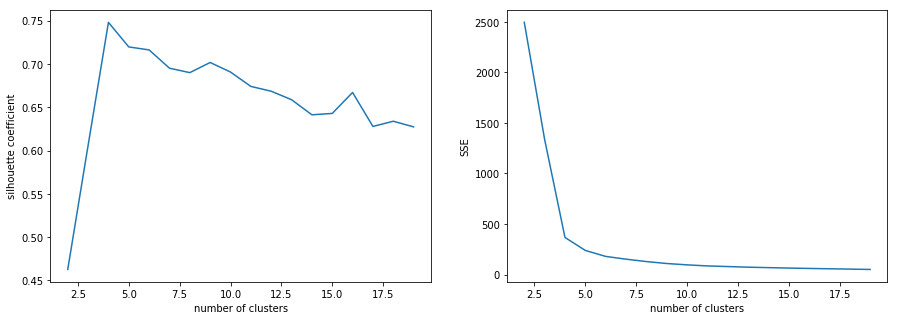

In [88]:
# number of clusters for kmeans
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# Sum of Square Error
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE')
plt.show();

In [89]:
km.labels_.shape

(8000,)

In [90]:
km = KMeans(n_clusters=8, random_state=1, init='k-means++')
clustered = km.fit_predict(sample_doc_topics)

In [91]:
pd.DataFrame(clustered)[0].value_counts()

4    1844
3    1582
5    1529
0    1112
7    645 
6    530 
2    513 
1    245 
Name: 0, dtype: int64